In [ ]:
import tensorflow
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
import os
for dirname, _, filenames in os.walk('../input/oct-data-short/Data Short'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [ ]:
CNV_DIR = "../input/oct-data-short/Data Short/train/CNV"
NORM_DIR = "../input/oct-data-short/Data Short/train/NORMAL"
DME_DIR = "../input/oct-data-short/Data Short/train/DME"
DRUSEN_DIR = "../input/oct-data-short/Data Short/train/DRUSEN"

In [ ]:
Cimages = os.listdir(CNV_DIR)
Nimages = os.listdir(NORM_DIR)
Dimages = os.listdir(DME_DIR)
DRimages = os.listdir(DRUSEN_DIR)

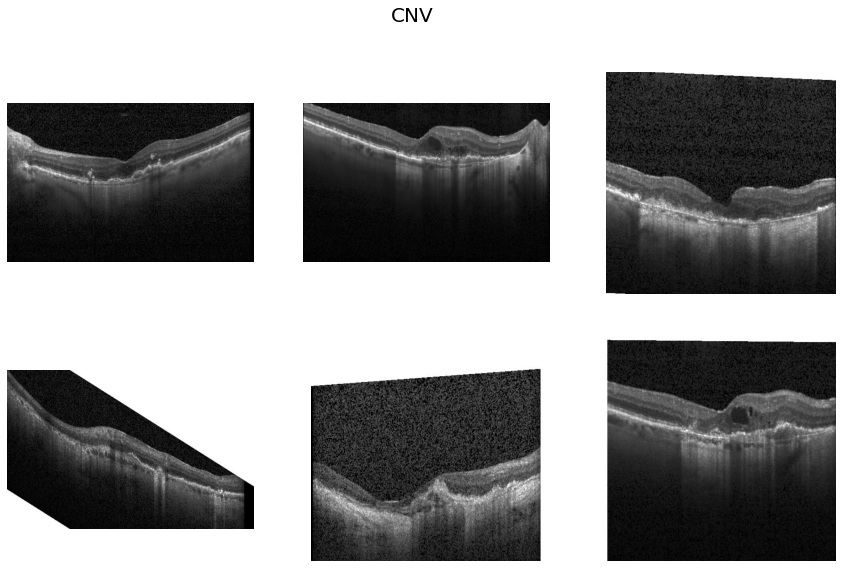

In [ ]:
sample_images = random.sample(Cimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/oct-data-short/Data Short/train/CNV/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('CNV',fontsize=20)
plt.show()

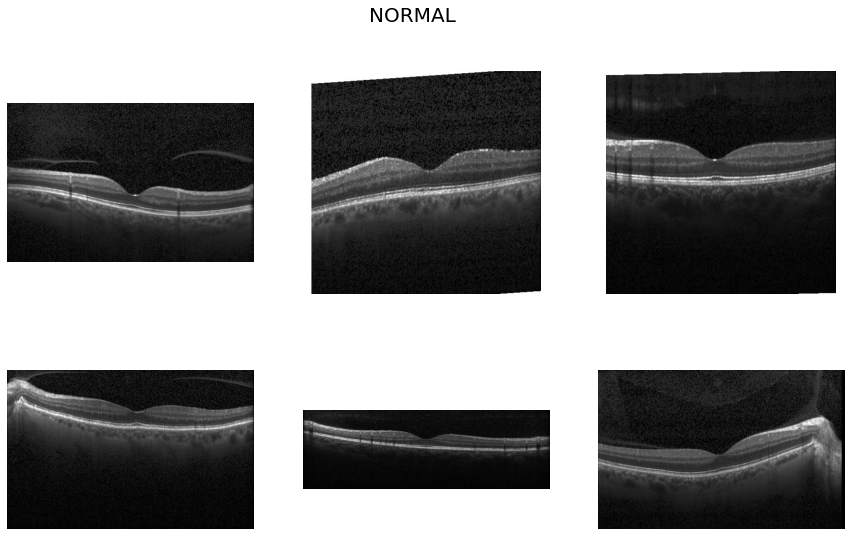

In [ ]:
sample_images = random.sample(Nimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/oct-data-short/Data Short/train/NORMAL/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('NORMAL',fontsize=20)
plt.show()

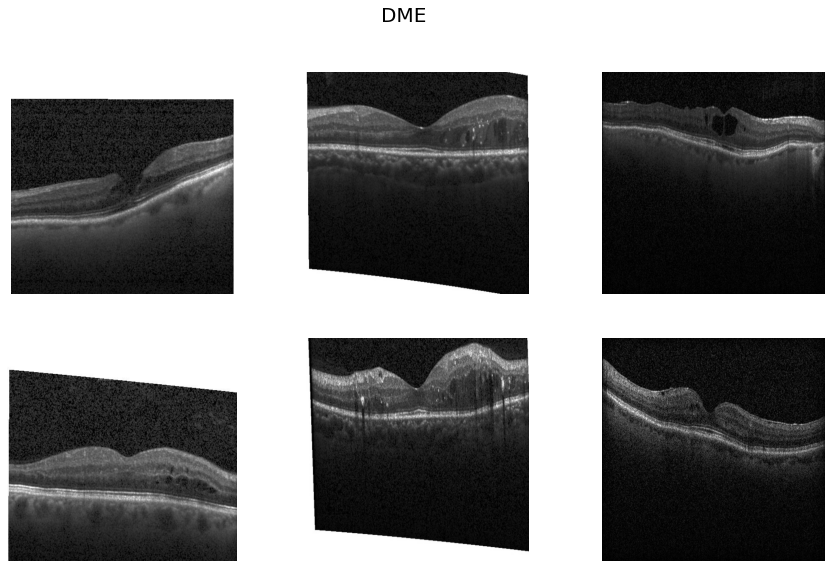

In [ ]:
sample_images = random.sample(Dimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/oct-data-short/Data Short/train/DME/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('DME',fontsize=20)
plt.show()

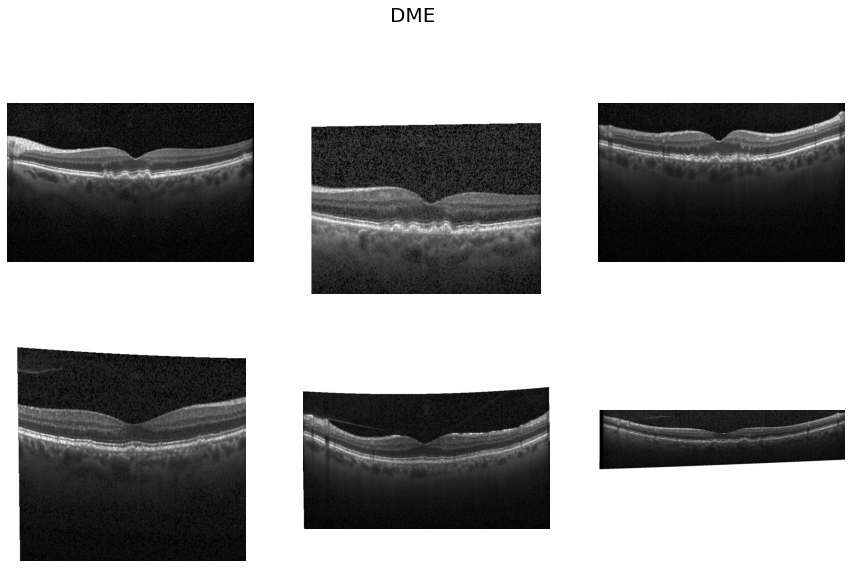

In [ ]:
sample_images = random.sample(DRimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/oct-data-short/Data Short/train/DRUSEN/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('DME',fontsize=20)
plt.show()

### Observation:

From the above sample images we can easily observed that:
- Normal CXR Images have clear lungs.
- Viral Infection CXR Images have slight congestion in lungs
- COVID-19 images have serious congestion in lungs

## Image Enhancement (White Balance and CLAHE)

This Kernel is inspired from  [COVIDLite](https://arxiv.org/pdf/2006.13873.pdf) Paper published in arXiv. In this paper authors have used White Balance and CLAHE as a image preprocessing step for detection of COVID-19 cases.

### 1. White Balance

White Balance is the image processing operation applied to adjust proper color fidelity in a digital image. Due to low lighting conditions in medical images, some of the parts of the image appeared dark and the image capturing equipment does not detect light precisely as the human eye does.

Due to this, image processing or correction help to ensure that the final image represents the colors of the natural image. The objective of this operation is to enhance the visibility of the image so that Deep CNNs could extract useful features from the image. The white balance algorithm adjusts the colors of the active layers of the image by stretching red, green, and blue channels independently.

For doing this, pixel colors discarded, which are at the end of the three channels and are used by only 0.05% of the pixels in the image, while stretching is performed for the remaining color range.

 After this operation, pixel colors infrequently present at the end of the channel could not negatively influence the upper and lower bound values while stretching. In this solution, we have implemented a white balance algorithm in python language using NumPy and OpenCV library.

The steps of the White balance algorithm can be summarized as:

![](https://i.ibb.co/1rR3h7v/white-balance.png)

where Pi(C) represents the taking the ith percentile of channel C, and Clip(., min, max) operation depicts performing saturation operation within min and max values. C, Cupd denotes the input and updated channels pixel values after the operation respectively.

### 2. CLAHE (Contrast Limited Adaptive Histogram Equalization)

It is an effective contrast enhancement method that effectively increases the contrast of the image. CLAHE is an improved version of the adaptivehistogram equation (AHE). 

Histogram equalization is the simple method for enhancing the contrast of the image by spreading out the intensity range of the image or stretching out the most frequent intensity value of the image. Stretching the intensity values changes the natural brightness of the input image and introduces some undesirable noise in the image. 

In AHE, the input image split into several small images, also known as tiles. In this method, the histogram of each tile computed, which corresponds to different sections of the image and uses them to derive intensity remapping function for each tile. 
This method introduces noise in the image due to over amplification. CLAHE works precisely the same as AHE, but it clips the histogram at specific values for limiting the amplification before computing the cumulative distributive function.

The overamplified part of the histogram is further redistributed over the histogram. In one of the previous studies, CLAHE showed exceptional results in enhancing chest CT images and considered useful in examining a wide variety of medical images. The computation of CLAHE is performed as:

![](https://i.ibb.co/MSM3MrN/CL1.png)

where, p represents pixel value after applying CLAHE, pmax , pmin represents maximum and minimum pixel value of an image respectively and P(f) represents cumulative probability distribution function.

![](https://i.ibb.co/DMkncVP/CLAHE.png)


In [ ]:
## Enhancing the CXR Images using White balance and CLAHE

def wb(channel, perc = 0.05):
    mi, ma = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
    channel = np.uint8(np.clip((channel-mi)*255.0/(ma-mi), 0, 255))
    return channel

## Data preparation

In [ ]:
data=[]
labels=[]
NORMAL=os.listdir("../input/oct-data-short/Data Short/train/NORMAL/")
for a in NORMAL:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("../input/oct-data-short/Data Short/train/NORMAL/"+a)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(0)

## Image normalization

In [ ]:
CNV=os.listdir("../input/oct-data-short/Data Short/train/CNV/")
for b in CNV:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("../input/oct-data-short/Data Short/train/CNV/"+b)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(1)

In [ ]:
DME=os.listdir("../input/oct-data-short/Data Short/train/DME/")
for c in DME:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("../input/oct-data-short/Data Short/train/DME/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(2)

In [ ]:
DRUSEN=os.listdir("../input/oct-data-short/Data Short/train/DRUSEN/")
for c in DRUSEN:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("../input/oct-data-short/Data Short/train/DRUSEN/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(3)

In [ ]:
# data normalization by dividing image pixels by 255
data = np.array(data) / 255.0
labels = np.array(labels)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,stratify=labels,test_size=0.20,  random_state=42)
#trainX, X_val, testX, y_val  = train_test_split(data,labels,stratify=labels,test_size=0.20,  random_state=42)

In [ ]:
trainAug  = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

## Model Building

In this kernel I will be using Depthwise separable CNNs

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (5,5), input_shape=(224,224,3), strides=(2,2), padding="valid", activation = "relu"))
model.add(Conv2D(32, (1,1), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 1

# 2nd Convolutional Layer
model.add(Conv2D(128, (1,1), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 1

# 3rd Convolutional Layer
model.add(Conv2D(128, (3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 2
model.add(Dropout(0.5))

model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 3

# 1st Fully Connected Layer
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5)) #DropOut

# 2nd Fully Connected Layer
model.add(Dense(4, activation = "softmax"))

EPOCHS = 50
BS = 16

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.2, min_lr=0.0001)

mcp_weight = ModelCheckpoint('RetinalNewModel.hdf5', save_best_only=True, monitor='val_loss', mode='min')

callbacks = [earlystop, learning_rate_reduction, mcp_weight]
metrics = ['accuracy',
                tf.keras.metrics.AUC(),
                tfa.metrics.CohenKappa(num_classes = 4),
                tfa.metrics.F1Score(num_classes = 4),
                tf.keras.metrics.Precision(), 
                tf.keras.metrics.Recall()]

# compile our model
print("[INFO] compiling model...")

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

[INFO] compiling model...
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 110, 110, 32)      2432      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 110, 110, 32)      1056      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 54, 54, 128)       4224      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling

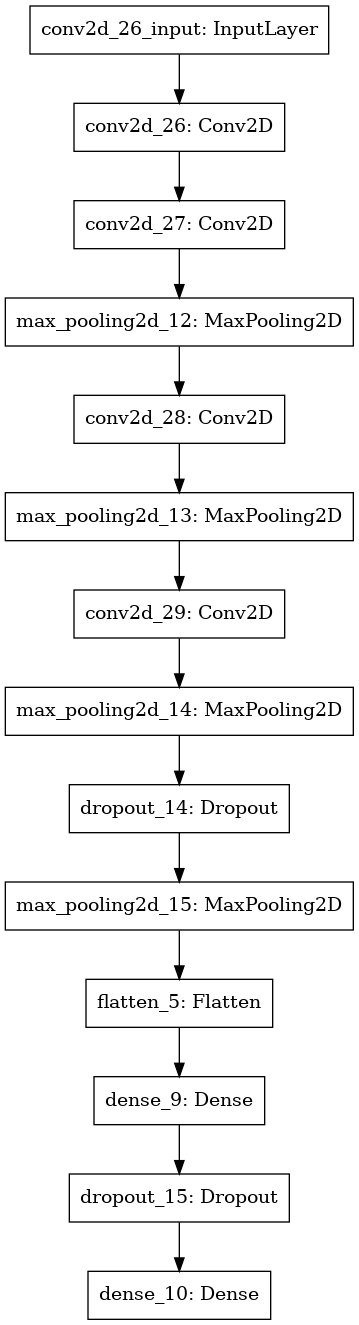

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
history=model.fit(trainX, trainY, epochs=60, validation_data=(testX, testY), batch_size=EPOCHS, callbacks=callbacks)

Epoch 1/60
34/34 [==============================] - 9s 58ms/step - loss: 1.4506 - accuracy: 0.2825 - val_loss: 1.3124 - val_accuracy: 0.3462
Epoch 2/60
34/34 [==============================] - 1s 36ms/step - loss: 1.2826 - accuracy: 0.4024 - val_loss: 1.1722 - val_accuracy: 0.5448
Epoch 3/60
34/34 [==============================] - 1s 37ms/step - loss: 1.0382 - accuracy: 0.5386 - val_loss: 0.9749 - val_accuracy: 0.6150
Epoch 4/60
34/34 [==============================] - 1s 37ms/step - loss: 0.9614 - accuracy: 0.5822 - val_loss: 0.9615 - val_accuracy: 0.6223
Epoch 5/60
34/34 [==============================] - 1s 37ms/step - loss: 0.8706 - accuracy: 0.6520 - val_loss: 0.7124 - val_accuracy: 0.7627
Epoch 6/60
34/34 [==============================] - 1s 38ms/step - loss: 0.6472 - accuracy: 0.7527 - val_loss: 0.7089 - val_accuracy: 0.7385
Epoch 7/60
34/34 [==============================] - 1s 36ms/step - loss: 0.5954 - accuracy: 0.7788 - val_loss: 0.6458 - val_accuracy: 0.7821
Epoch 8/60
34

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


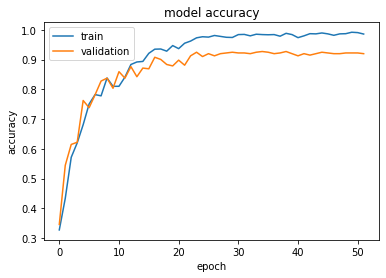

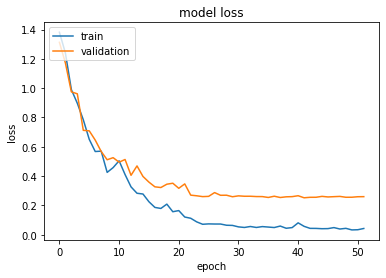

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model Evaluation

In [ ]:
## Loading best model based on its weights

from numpy import loadtxt
from tensorflow.keras.models import load_model
model = load_model('RetinalNewModel.hdf5')
score = model.evaluate(testX, testY,verbose=1)

print(score)

13/13 [==============================] - 0s 11ms/step - loss: 0.2524 - accuracy: 0.9201
[0.2524018883705139, 0.9200968742370605]


52/52 [==============================] - 0s 4ms/step


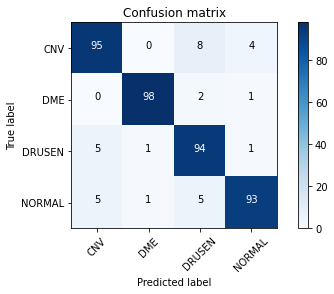

In [ ]:
import itertools
pred_Y = model.predict(testX, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['CNV','DME','DRUSEN', 'NORMAL']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX, batch_size=BS)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3)) 

## Classification Report

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
print(classification_report(testY, predIdxs,target_names=['CNV','DME','DRUSEN', 'NORMAL']))

              precision    recall  f1-score   support

         CNV       0.90      0.89      0.90       107
         DME       0.98      0.97      0.98       101
      DRUSEN       0.86      0.93      0.90       101
      NORMAL       0.94      0.89      0.92       104

    accuracy                           0.92       413
   macro avg       0.92      0.92      0.92       413
weighted avg       0.92      0.92      0.92       413



## Plotting ROC-AUC Curve

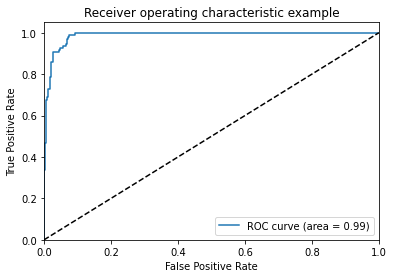

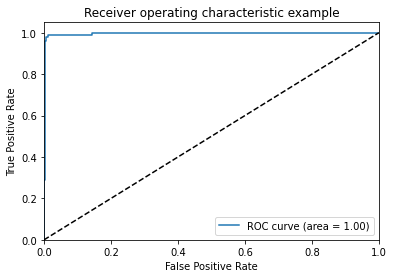

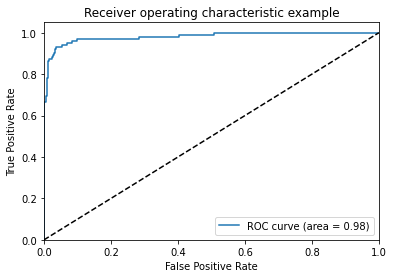

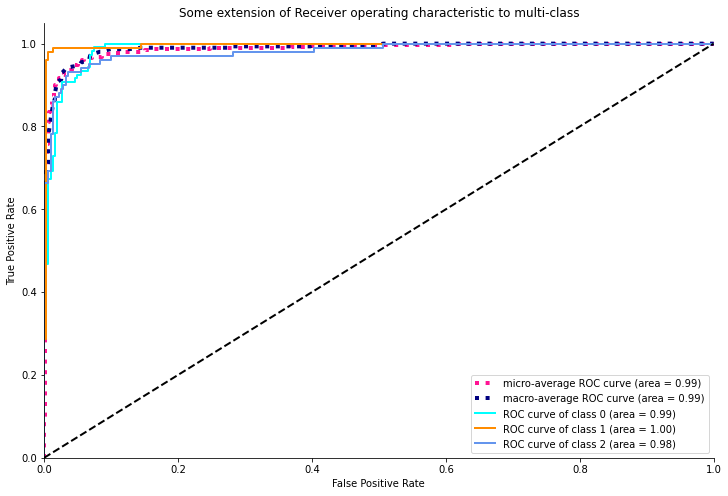

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_test = pd.get_dummies(testY)
y_test = np.array(y_test)

n_classes = 3


# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [ ]:
def specificity(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    fp = K.sum(neg_y_true * y_pred)
    tn = K.sum(neg_y_true * neg_y_pred)
    specificity = tn / (tn + fp + K.epsilon())
    return specificity

In [ ]:
print(specificity(y_test, Y_pred))

tf.Tensor(0.9568057, shape=(), dtype=float32)


## Plotting Model Prediction

In [ ]:
# getting predictions on val set.
pred=model.predict(testX, batch_size=BS)
Y_pred_classes=np.argmax(pred,axis=1)

Y_true = np.argmax(testY,axis = 0) 

# Mapping Classes
classes = {0 : 'Normal',
            1 : 'CNV',
            2 : 'DEM',
            3 : 'DRUSEN'}

In [ ]:
incorrect = []
for i in range(len(testY)):
    if(not Y_pred_classes[i] == testY[i]):
        incorrect.append(i)
    if(len(incorrect) == 252):
        break

correct = []
for i in range(len(testY)):
    if(Y_pred_classes[i] == testY[i]):
        correct.append(i)
    if(len(correct) == 300):
        break

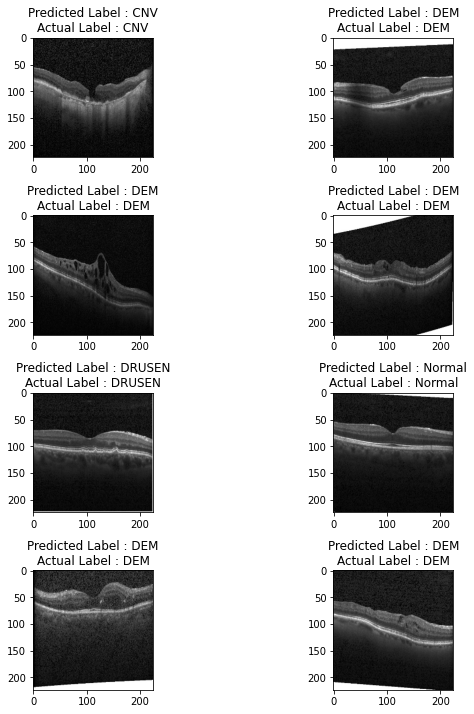

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[0]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[0]]]))

ax[0,1].imshow(testX[correct[1]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[1]]]))
ax[1,0].imshow(testX[correct[2]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[2]]]))
ax[1,1].imshow(testX[correct[3]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[3]]]))
ax[2,0].imshow(testX[correct[4]], cmap='gray')
ax[2,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[4]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[4]]]))
ax[2,1].imshow(testX[correct[5]], cmap='gray')
ax[2,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[5]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[5]]]))
ax[3,0].imshow(testX[correct[6]], cmap='gray')
ax[3,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[6]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[6]]]))
ax[3,1].imshow(testX[correct[7]], cmap='gray')
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[7]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[7]]]))
fig.tight_layout(pad=1.0)
plt.show()

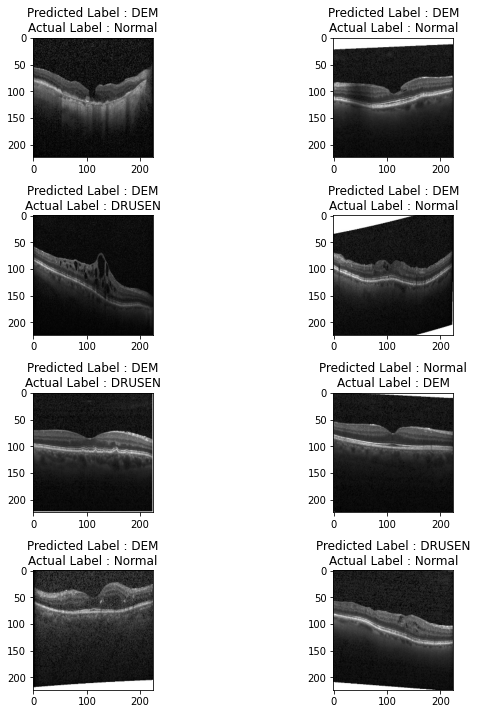

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[0]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[0]]]))

ax[0,1].imshow(testX[correct[1]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[1]]]))
ax[1,0].imshow(testX[correct[2]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[2]]]))
ax[1,1].imshow(testX[correct[3]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[3]]]))
ax[2,0].imshow(testX[correct[4]], cmap='gray')
ax[2,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[4]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[4]]]))
ax[2,1].imshow(testX[correct[5]], cmap='gray')
ax[2,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[5]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[5]]]))
ax[3,0].imshow(testX[correct[6]], cmap='gray')
ax[3,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[6]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[6]]]))
ax[3,1].imshow(testX[correct[7]], cmap='gray')
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[7]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[7]]]))
fig.tight_layout(pad=1.0)
plt.show()

## Model Explanation

Analyzing Correct predictions by Model Using LIME

In [ ]:
import lime
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(testX[correct[168]], model.predict, top_labels=5, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

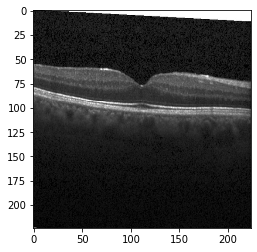

Text(0.5, 1.0, 'Predicted Label : DEM Actual Label : DEM')

In [ ]:
pic=testX[correct[5]]
plt.imshow(pic, interpolation='nearest')
plt.show()
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[168]]]) + " "+"Actual Label : " + 
                 str(classes[testY[correct[168]]]))

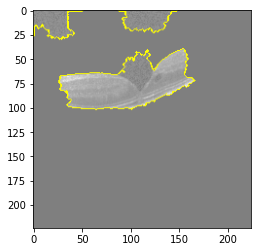

In [ ]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

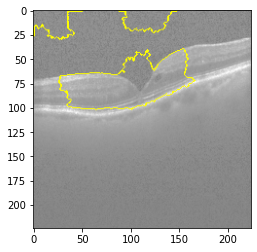

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

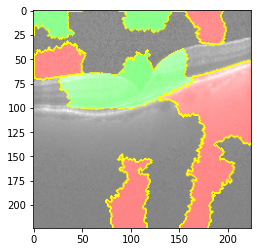

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Text(0.5, 1.0, 'Positive/Negative Regions for 2')

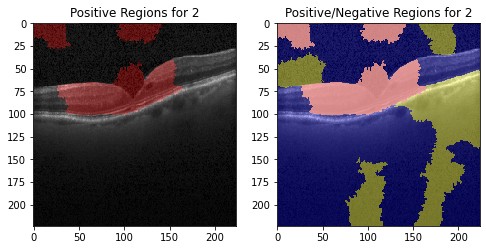

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(explanation.top_labels[0]))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(explanation.top_labels[0]))

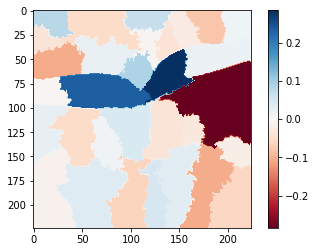

In [ ]:
#Select the same class explained on the figures above.
#Alternatively, we can also plot explanation weights onto a heatmap visualization. The colorbar shows the values of the weights.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

## GradCAM Heatmap

In [ ]:
!pip install tf-keras-vis

     |████████████████████████████████| 53 kB 438 kB/s eta 0:00:01


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 100	Scores: [7096.99853515625],	Regularization: [('TotalVariation2D', [7.820815086364746]), ('Norm', [33.57902526855469])]
Steps: 200	Scores: [11214.3251953125],	Regularization: [('TotalVariation2D', [6.975934028625488]), ('Norm', [31.44707679748535])]


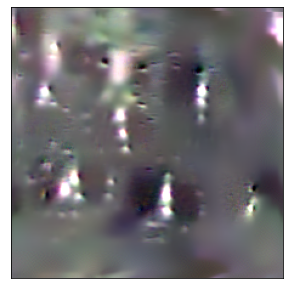

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Activation Maximization object
activation_maximization = ActivationMaximization(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda x: K.mean(x[:, 1])

# Generate max activation with debug printing
activation = activation_maximization(loss, callbacks=[Print(interval=100)])
image = activation[0].astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()


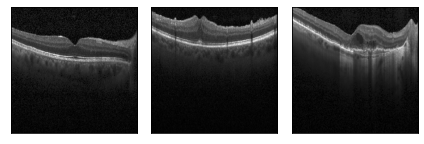

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img

# Load images
img1 = load_img('../input/oct-data-short/Data Short/train/NORMAL/NORMAL-100580-1.jpeg', target_size=(224, 224))
img2 = load_img('../input/oct-data-short/Data Short/train/DME/DME-119840-1.jpeg', target_size=(224, 224))
img3 = load_img('../input/oct-data-short/Data Short/train/CNV/CNV-103044-1.jpeg', target_size=(224, 224))

images = np.asarray([np.array(img1), np.array(img2),np.array(img3)])

# Prepare datasets
X = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 3,
    'figsize': (6, 3),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

In [ ]:
# Define loss function. 1 is the imagenet index corresponding to Goldfish,
# And 294 is one corresponding to Bear.
def loss(output):
    return (output[1][1], output[0][1])

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

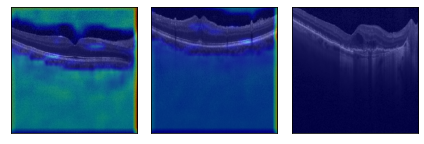

In [ ]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()

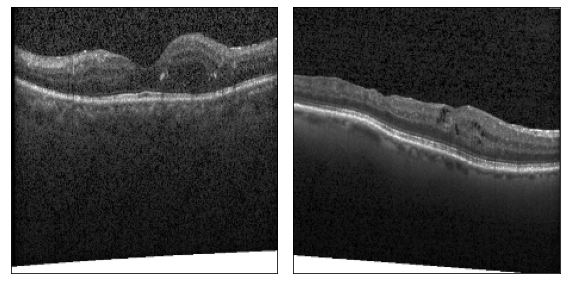

In [ ]:
ins = np.asarray([np.array(testX[correct[6]]), np.array(testX[correct[7]])])
S = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (8, 4),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(ins)):
    ax[i].imshow(ins[i])
plt.tight_layout()
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

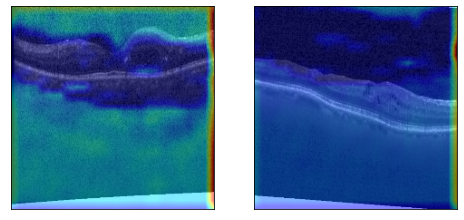

In [ ]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, S)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(ins[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()

## Saliency Maps

IndexError: index 2 is out of bounds for axis 0 with size 2

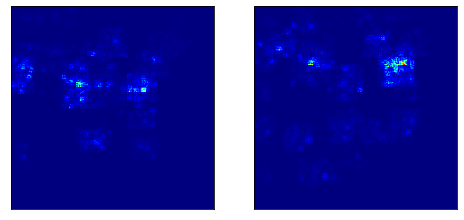

In [ ]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# Create Saliency object
saliency = Saliency(model, model_modifier, clone=False)

# Generate saliency map
saliency_map = saliency(loss, S)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

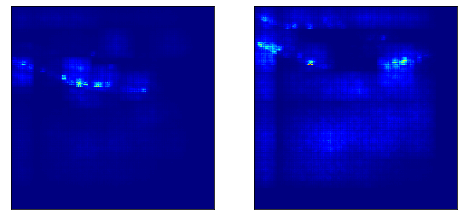

In [ ]:
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(loss, S, smooth_samples=100)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

In [ ]:
explanation = explainer.explain_instance(testX[correct[20]], model.predict, top_labels=5, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]